## 📊 Centro de Informática da Universidade Federal de Pernambuco
### Pós-graduação em Ciências da Computação

#### Disciplina IN1167 Séries Temporais
**Gustavo Prazeres Paz do Nascimento (gppn)**

---
#### 📋 Lista de Exercícios - Análise de Modelos de Séries Temporais
---

#### 📊 Modelos
1. Random Walk
2. AR, MA
3. ARIMA
4. ARCH
5. GARCH

##### Variar os parâmetros dos modelos para demonstrar sua influência nos resultados.
---

Séries temporais escolhidas:

1. **Série 1**: Dados de vendas de uma loja de varejo
2. **Série 2**: Valores de fechamento da ação da Petrobrás (PBR)

In [ ]:
%pip install yfinance matplotlib sklearn
%pip install scikit-learn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [12]:
import yfinance as yf

# Reading Apple shares from yahoo finance server    
shares_df = yf.download('PBR', start='2024-01-01', end='2024-12-31')

print(shares_df)

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            PBR        PBR        PBR        PBR       PBR
Date                                                            
2024-01-02  14.094266  14.288061  14.023795  14.173546  10100000
2024-01-03  14.605185  14.658038  14.094267  14.129504  18366800
2024-01-04  14.402578  14.790171  14.402578  14.569948  13954700
2024-01-05  14.569948  14.666845  14.420197  14.596374   9872000
2024-01-08  14.340917  14.340917  14.067840  14.296871  14011800
...               ...        ...        ...        ...       ...
2024-12-23  12.472659  12.540183  12.347257  12.520890  12786800
2024-12-24  12.569121  12.646292  12.376196  12.434074   5292300
2024-12-26  12.627000  12.694524  12.434074  12.511244  13939300
2024-12-27  12.610000  12.690000  12.550000  12.590000  13744700
2024-12-30  12.750000  12.830000  12.620000  12.700000  12529200

[251 rows x 5 columns]


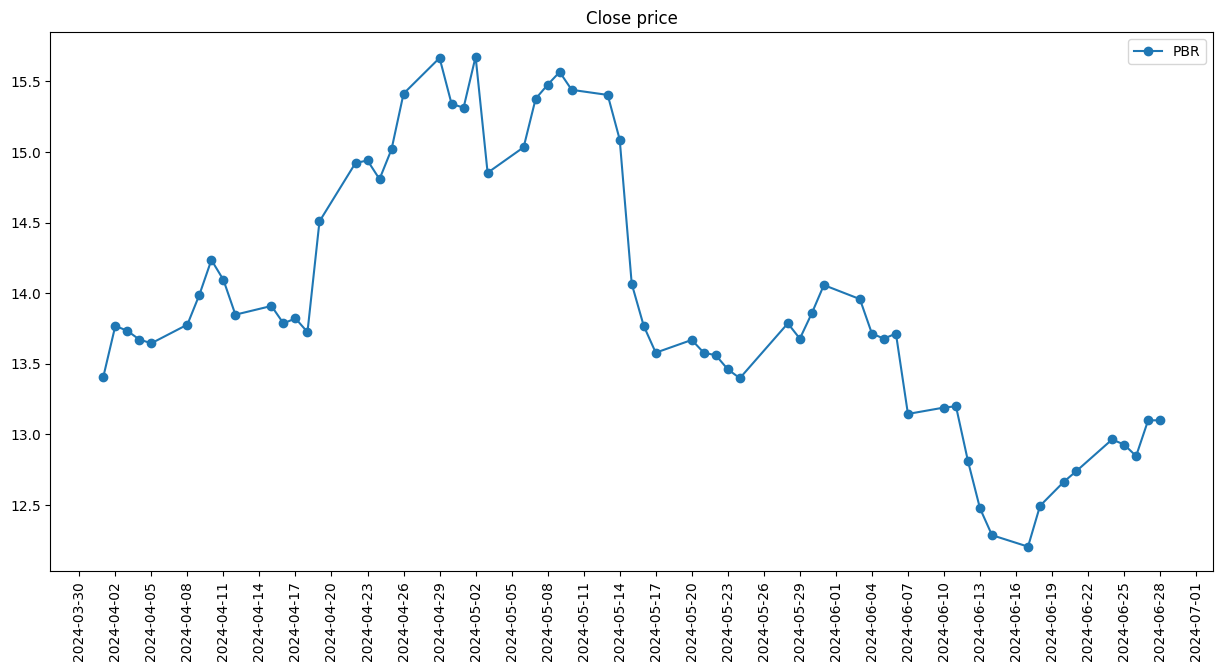

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# General routine for plotting time series data
def plot_timeseries_df(df, attrib, ticker_loc=1, title='Timeseries', legend=''):
    fig = plt.figure(figsize=(15,7))
    plt.plot(df[attrib], 'o-')
    x = plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(ticker_loc))
    plt.title(title)
    plt.gca().legend([legend])  # Pass legend as a list
    plt.show()

# Accessing the multi-index column ('Close', 'PBR')
plot_timeseries_df(shares_df.loc["2024-04-01":"2024-06-30"], ("Close", "PBR"),
                   ticker_loc=3, title="Close price", legend="PBR")

Random Walk

Random MSE: 1.982


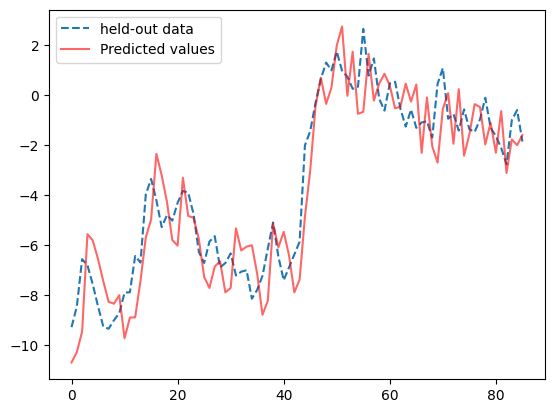

In [24]:
from sklearn.metrics import mean_squared_error
from random import random

# Prepare dataset
random_walk = shares_df[("Random Walk", "")].values
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# Random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]

# Calculate error
error = mean_squared_error(test, predictions)
print('Random MSE: %.3f' % error)

# Plot results
plt.plot(test, label='held-out data', linestyle='--')
plt.plot(predictions, 'r', alpha=.6, label='Predicted values')
plt.legend()
plt.show()

AR, MA e ARIMA

ModuleNotFoundError: No module named 'statsmodels'